EN3150                                  P.D.G.U.M.B. Weerasinghe                                            200702H                                         Assignment 04

EN3150 Assignment 04: Kernel Methods

QUESTION 04 

Finding Kernal Matrix

In [1]:
import numpy as np

# Given data
X = np.array([[1, 5], [3, 4], [4, 2], [10, 12]])

# Kernel function
def kernel(x, z):
    return (1 + np.dot(x, z))**2

# Calculate kernel matrix
kernel_matrix = np.zeros((len(X), len(X)))
for i in range(len(X)):
    for j in range(len(X)):
        kernel_matrix[i, j] = kernel(X[i], X[j])

print("Kernel Matrix:")
print(kernel_matrix)


Kernel Matrix:
[[  729.   576.   225.  5041.]
 [  576.   676.   441.  6241.]
 [  225.   441.   441.  4225.]
 [ 5041.  6241.  4225. 60025.]]


Justifying Whether Valid or not

In [2]:
eigenvalues, _ = np.linalg.eig(kernel_matrix)
print("Eigenvalues:")
print(eigenvalues)


Eigenvalues:
[6.13971435e+04 3.82206067e+02 8.15317855e+01 1.01186495e+01]


QUESTION 05

PART a.

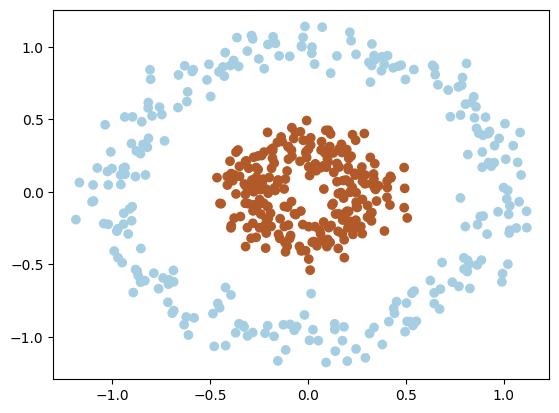

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate data with make_circles
np.random.seed(5)
X, y = make_circles(n_samples=500, factor=0.3, noise=0.1)

# (a) Plot the scatter plot of the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()


PART b.

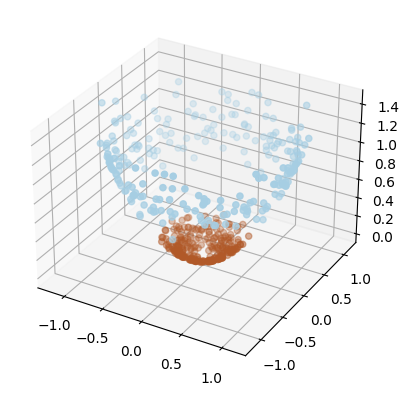

In [4]:
# (b) Map two-dimensional space to three-dimensional space
phi_X = np.column_stack((X[:, 0], X[:, 1], X[:, 0]**2 + X[:, 1]**2))

# Visualize the projected set
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap=plt.cm.Paired)
plt.show()


PART c.

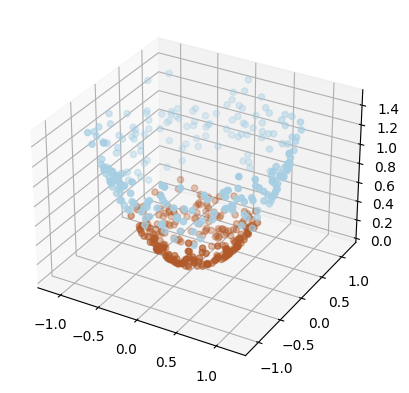

In [5]:
# Change the factor to 0.5
X_new, y_new = make_circles(n_samples=500, factor=0.5, noise=0.1)

# Map two-dimensional space to three-dimensional space for the new data
phi_X_new = np.column_stack((X_new[:, 0], X_new[:, 1], X_new[:, 0]**2 + X_new[:, 1]**2))

# Visualize the projected set for the new data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(phi_X_new[:, 0], phi_X_new[:, 1], phi_X_new[:, 2], c=y_new, cmap=plt.cm.Paired)
plt.show()


Part c : with a new mapping

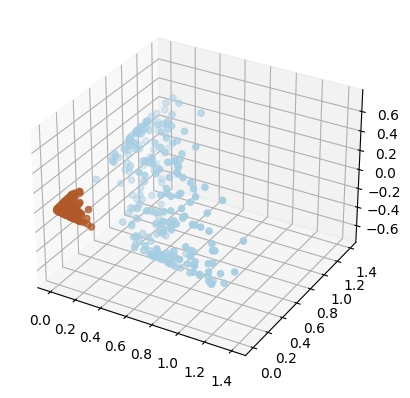

In [6]:
# Map two-dimensional space to three-dimensional space using the new mapping
phi_X_new_mapping = np.column_stack((X[:, 0]**2, X[:, 1]**2, X[:, 0] * X[:, 1]))

# Visualize the projected set for the new mapping
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(phi_X_new_mapping[:, 0], phi_X_new_mapping[:, 1], phi_X_new_mapping[:, 2], c=y, cmap=plt.cm.Paired)
plt.show()


PART d. 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear SVC on the original dataset
svc_original = SVC(kernel='linear')
svc_original.fit(X_train, y_train)
y_pred_original = svc_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Linear SVC on the projected set (using the mapping from 5b)
svc_mapped = SVC(kernel='linear')
svc_mapped.fit(phi_X, y)  # Using phi_X instead of phi_X_test
phi_X_test = np.column_stack((X_test[:, 0], X_test[:, 1], X_test[:, 0]**2 + X_test[:, 1]**2))
y_pred_mapped = svc_mapped.predict(phi_X_test)  # Predict using the transformed test set
accuracy_mapped = accuracy_score(y_test, y_pred_mapped)

print("Accuracy on original dataset:", accuracy_original)
print("Accuracy on projected set:", accuracy_mapped)


Accuracy on original dataset: 0.45
Accuracy on projected set: 1.0
